In [26]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt

# Reading the audio

In [34]:
y, sr = librosa.load('./labeled_recs_sample/W52753S23867_20200124_081000.wav')
y -= np.mean(y)
y /= np.std(y)

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10, n_fft=2048, hop_length=512)
mel = np.log10(librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)) * 10
bounds = librosa.segment.agglomerative(mel, 10)
bound_times = librosa.frames_to_time(bounds, sr=sr, n_fft=2048, hop_length=512)
mel

array([[ 33.06531  ,  34.046047 ,  37.921837 , ...,  33.69961  ,
         29.736063 ,  32.951027 ],
       [ 30.498438 ,  38.53835  ,  41.911674 , ...,  32.711998 ,
         32.60789  ,  30.680143 ],
       [ 19.437902 ,  32.65622  ,  35.97258  , ...,  34.44828  ,
         34.358643 ,  30.475386 ],
       ...,
       [ -4.640159 ,  -9.414767 , -14.948654 , ..., -14.311304 ,
        -13.52263  , -12.375798 ],
       [ -4.9267244, -10.868672 , -26.481571 , ..., -21.889145 ,
        -21.401854 , -20.081398 ],
       [ -5.3226576, -11.333213 , -43.92726  , ..., -40.4366   ,
        -39.045326 , -28.888876 ]], dtype=float32)

# Aplying Noise Profiling

In [35]:
frequency_means = np.sum(mel, axis=0)

# Getting the means of the frequencies
for i in range(len(frequency_means)):
  frequency_means[i] = frequency_means[i]/len(mel[0])

frequency_means

array([0.25939697, 0.36660007, 0.36280403, ..., 0.46345803, 0.4671723 ,
       0.44205958], dtype=float32)

# Applying results on the frequencies

In [36]:
for i in range(len(mel)):
  for j in range(len(mel[i])):
    mel[i][j] -= frequency_means[i]

mel

array([[ 32.805916 ,  33.78665  ,  37.66244  , ...,  33.440216 ,
         29.476665 ,  32.69163  ],
       [ 30.131838 ,  38.17175  ,  41.545074 , ...,  32.345398 ,
         32.24129  ,  30.313543 ],
       [ 19.075098 ,  32.293415 ,  35.609776 , ...,  34.085476 ,
         33.99584  ,  30.112581 ],
       ...,
       [ -5.057167 ,  -9.831775 , -15.365662 , ..., -14.728312 ,
        -13.939637 , -12.792806 ],
       [ -5.3532953, -11.295243 , -26.908142 , ..., -22.315716 ,
        -21.828424 , -20.507969 ],
       [ -5.732339 , -11.742894 , -44.33694  , ..., -40.84628  ,
        -39.455006 , -29.298557 ]], dtype=float32)

[Text(0.5, 1.0, 'Power Spectrogram')]

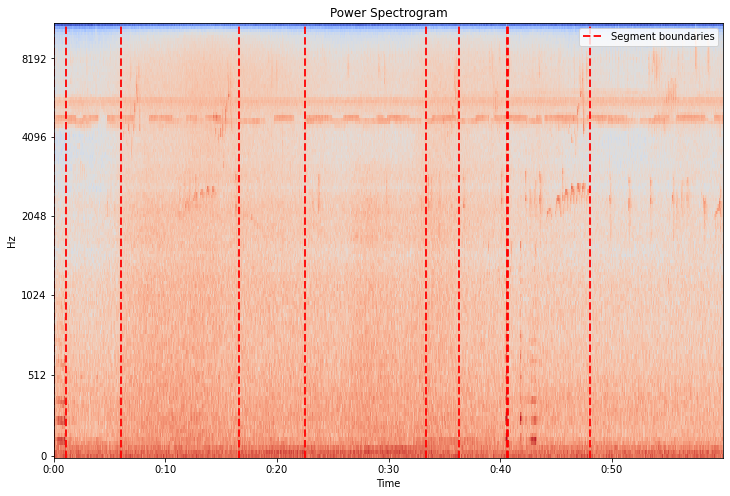

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
trans = mpt.blended_transform_factory(ax.transData, ax.transAxes)
librosa.display.specshow(mel, y_axis='mel', x_axis='time', ax=ax, n_fft=2048, hop_length=512, sr=sr)
ax.vlines(bound_times,
          0, 
          1,
          color='red',
          linestyle='--',
          linewidth=2,
          alpha=0.9,
          label='Segment boundaries',
          transform=trans,
         )
ax.legend()
ax.set(title='Power Spectrogram')